In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the AQI dataset
file_path = "the data set AQI COE project.csv" 
aqi_data = pd.read_csv(file_path)

# Preprocessing the AQI dataset
aqi_data_cleaned = aqi_data.copy()

# Handling missing values if any
for column in aqi_data_cleaned.columns:
    if aqi_data_cleaned[column].isnull().sum() > 0:
        if aqi_data_cleaned[column].dtype == 'object':
            aqi_data_cleaned[column].fillna(aqi_data_cleaned[column].mode()[0], inplace=True)
        else:
            aqi_data_cleaned[column].fillna(aqi_data_cleaned[column].median(), inplace=True)

# Encoding the target variable (AQI Category)
label_encoder = LabelEncoder()
aqi_data_cleaned['AQI Category'] = label_encoder.fit_transform(aqi_data_cleaned['AQI Category'])

# Selecting features and target
features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
target = 'AQI Category'

X = aqi_data_cleaned[features]
y = aqi_data_cleaned[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing K-NN
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing 5 as the initial K
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[2102    0  126    0    0    0]
 [   0   16    0    0    0    0]
 [  79    0 1998    1   14    0]
 [   0    1    0  260   11    1]
 [   0    0   34   21  208    0]
 [   0    2    0   13    0   31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2228
           1       0.84      1.00      0.91        16
           2       0.93      0.96      0.94      2092
           3       0.88      0.95      0.92       273
           4       0.89      0.79      0.84       263
           5       0.97      0.67      0.79        46

    accuracy                           0.94      4918
   macro avg       0.91      0.89      0.89      4918
weighted avg       0.94      0.94      0.94      4918


Accuracy: 0.9383895892639285


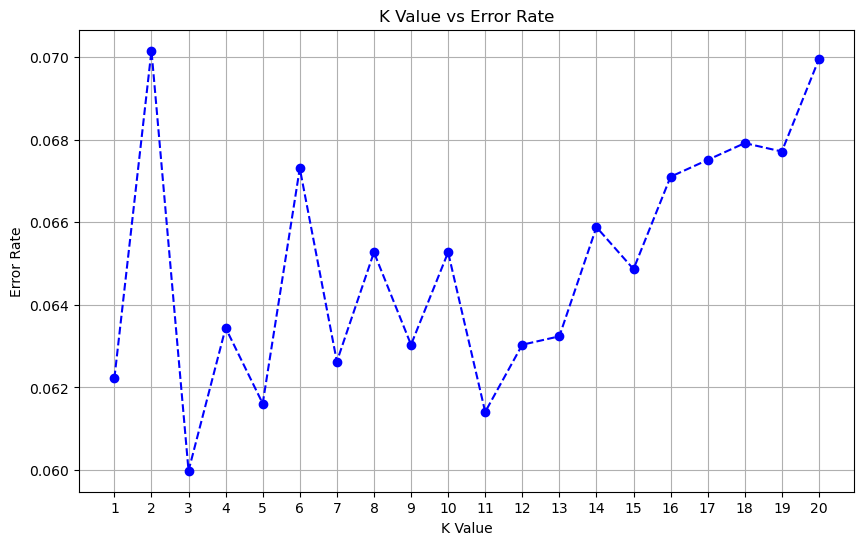

Results Summary:
Optimal K: 3

Confusion Matrix:
[[2105    0  123    0    0    0]
 [   0   16    0    0    0    0]
 [  84    0 1988    0   20    0]
 [   0    1    0  261   11    0]
 [   0    0   26   20  217    0]
 [   0    2    0    8    0   36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2228
           1       0.84      1.00      0.91        16
           2       0.93      0.95      0.94      2092
           3       0.90      0.96      0.93       273
           4       0.88      0.83      0.85       263
           5       1.00      0.78      0.88        46

    accuracy                           0.94      4918
   macro avg       0.92      0.91      0.91      4918
weighted avg       0.94      0.94      0.94      4918

Accuracy: 0.94

Cross-Validation Scores for each fold:
[0.96553827 0.95882891 0.9652333  0.9643075  0.96247712]
Mean Cross-Validation Accuracy: 0.96


In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



# Choosing the Right Value of K
error_rates = []

# Testing K values from 1 to 20
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    error_rate = np.mean(y_pred_temp != y_test)
    error_rates.append(error_rate)

# Plot K vs Error Rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='blue')
plt.title('K Value vs Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Optimal K value is the one with the lowest error rate
optimal_k = error_rates.index(min(error_rates)) + 1

# Re-train the model with the optimal K value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_optimal.predict(X_test_scaled)

#  Model Performance
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
classification_rep_optimal = classification_report(y_test, y_pred_optimal)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)

#Cross-Validation
cv_scores = cross_val_score(knn_optimal, X, y, cv=5)


#Results
print("Results Summary:")
print("=================")
print(f"Optimal K: {optimal_k}\n")
print("Confusion Matrix:")
print(conf_matrix_optimal)
print("\nClassification Report:")
print(classification_rep_optimal)
print(f"Accuracy: {accuracy_optimal:.2f}\n")
print("Cross-Validation Scores for each fold:")
print(cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")

    
    